Este projeto tem por objetivo transformar uma imagem em tons de cinza e posteriormente ser binarizada, ou seja, preto e banco.
A ideia é não utilizar uma biblioteca que realize o procedimento mas realizar de forma manual.

- (English Translate)


This project aims to convert an image into grayscale and subsequently binarize it, that is, transform it into black and white.
The intention is to avoid using a library that performs this procedure automatically, carrying it out instead in a manual manner.


O primeiro passo é importar as bibliotecas

- (English Translate)

The first step is to import the libraries.

In [ ]:
# Importando Bibliotecas
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

Em seguida temos que ter acesso ao drive, já que estamos usano o Google Colab

- (English Translate)

Next, we need to access the drive, since We are using Google Colab.

In [ ]:
# Acessando o drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Aqui prefiro criar uma variável e inserir o caminho da imagem mas, nada impede que insira o caminho dentro da função.

- (English Translate)

Here, I prefer to create a variable and assign the image path to it; however, there is nothing to prevent inserting the path directly into the function.

In [ ]:
# Caminho da imagem
caminho_imagem = "/content/drive/MyDrive/Datasets/DESAFIOS_CODIGOS/DIMENSIONALIDADE/Lena_Colorida.jpg"

# Abrir imagem
img = Image.open(caminho_imagem)

Após trazer a imagem desejada para o código, precisamos transformá-la no formato de matriz.

- (English Translate)

After loading the desired image into the code, we need to convert it into a matrix format.

In [ ]:
# Converter para array
img_array = np.array(img)
altura, largura, _ = img_array.shape

A matriz criada no código anterior, que representa a imagem, está no formato RGB, ou seja,  temos 3 matrizes bidimencio que estão rodando para a mesma imagem.

Uma matriz bidimensional para R;
Uma matriz bidimensional para G;
Uma matriz bidimensional para B

Como o objetivo é transformar para tons de cinza precisanos converter a matriz de forma que rode apenas 1 matriz bidimencional com escala de valores de 0 - 255. Isso nos ajudrá a ter menor gasto computacional.



- (English Translate)

The matrix created in the previous code, which represents the image, is in RGB format; that is, we have three two-dimensional matrices corresponding to the same image.

A two-dimensional matrix for R;
A two-dimensional matrix for G;
A two-dimensional matrix for B.

Since the objective is to convert the image to grayscale, we need to transform the matrix so that it uses only a single two-dimensional matrix with a value scale from 0 to 255. This will help reduce computational cost.

In [ ]:
# -------------------------
# Conversão para tons de cinza
# -------------------------
img_cinza = np.zeros((altura, largura), dtype=np.uint8)

for i in range(altura):
    for j in range(largura):
        r, g, b = img_array[i, j]
        img_cinza[i, j] = int(0.299*r + 0.587*g + 0.114*b)

Usando o ccódigo acima de tons de cinza, podemos binarizar (**Limiarização**), ou seja, transformar a imagem em 2 cores (preto e branco).
Para que isso aconteça precisamos ter um valor de limiar (parâmetro), no caso usaremos o ponto médio (255/2 = 127,5), por aproximação vai para **128**.

Assim temos uma matriz que:

de 0 a 127 = preto;

de 128 a 255 = branco;

Obs.: Esse limiar pode ser ajustado conforme a necessidade individual, neste caso estou utilizando o ponto médio.

- (English Translate)

Using the grayscale code above, we can perform binarization (**threshold**), that is, convert the image into two colors (black and white).
For this to occur, we need to define a threshold value (parameter). In this case, we will use the midpoint (255/2 = 127.5), which by approximation becomes 128.

Thus, we obtain a matrix in which:

values from 0 to 127 correspond to black;

values from 128 to 255 correspond to white.

Note: This threshold can be adjusted according to individual needs; in this case, the midpoint is being used.

In [ ]:
# -------------------------
# Conversão para binarização
# -------------------------

T = 128   # limiar da binarização (ajustável)

img_binaria = np.where(img_cinza >= T, 255, 0).astype(np.uint8)   # Aproveitando a função anterior já existente em tons de cinza

Por fim, realizo o print das 3 imagens:

Colorida;

Tons de Cinza e,

Binarizada (preto e branco)



- (English Translate)

Finally, I print the three images:

Color;

Grayscale and

Binarized (black and white).

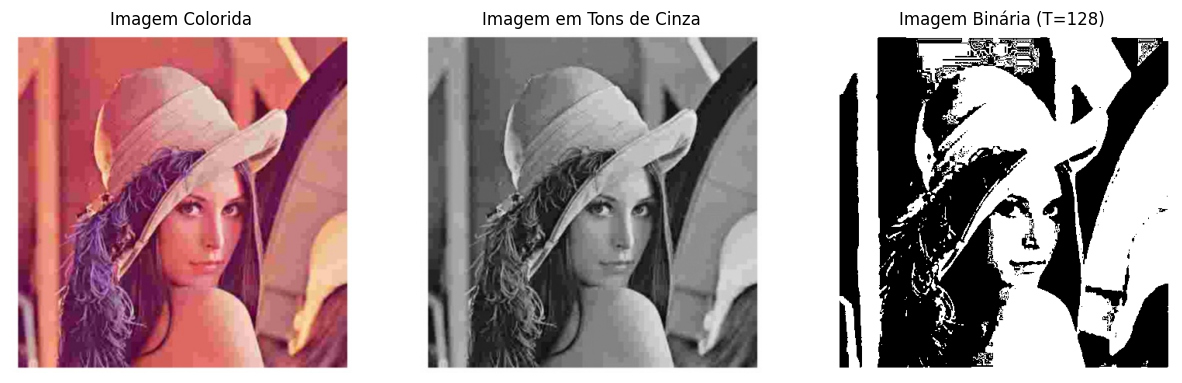

In [ ]:
# -------------------------
# Exibindo imagens
# -------------------------
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_array)
plt.title("Imagem Colorida")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_cinza, cmap="gray")
plt.title("Imagem em Tons de Cinza")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_binaria, cmap="gray")
plt.title(f"Imagem Binária (T={T})")
plt.axis("off")

plt.show()